In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects
import numpy as np
import pandas as pd
import vice
import seaborn as sns

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import surp
from surp import gce_math as gcem
import arya

In [9]:
model_dir = "../models/C11_f0.2/"

In [10]:
fiducial = surp.ViceModel.from_saved(model_dir + "model.json")

In [11]:
surp.yields.set_yields(surp.yields.YieldParams.from_file(model_dir + "yield_params.json"))

In [14]:
surp.yields.calc_y()

0.002560241230032815

In [15]:
def calc_c_a(M_H):
    Z = gcem.MH_to_Z(M_H)
    return gcem.abund_to_brak(calc_y(Z, "c") / calc_y(Z, "mg"), "c", "mg")

In [16]:
x_pred = np.linspace(-1, 0.5, 1000)
y_pred = calc_c_a(x_pred)

In [17]:
calc_c_a(0.2)

-0.05330599133058633

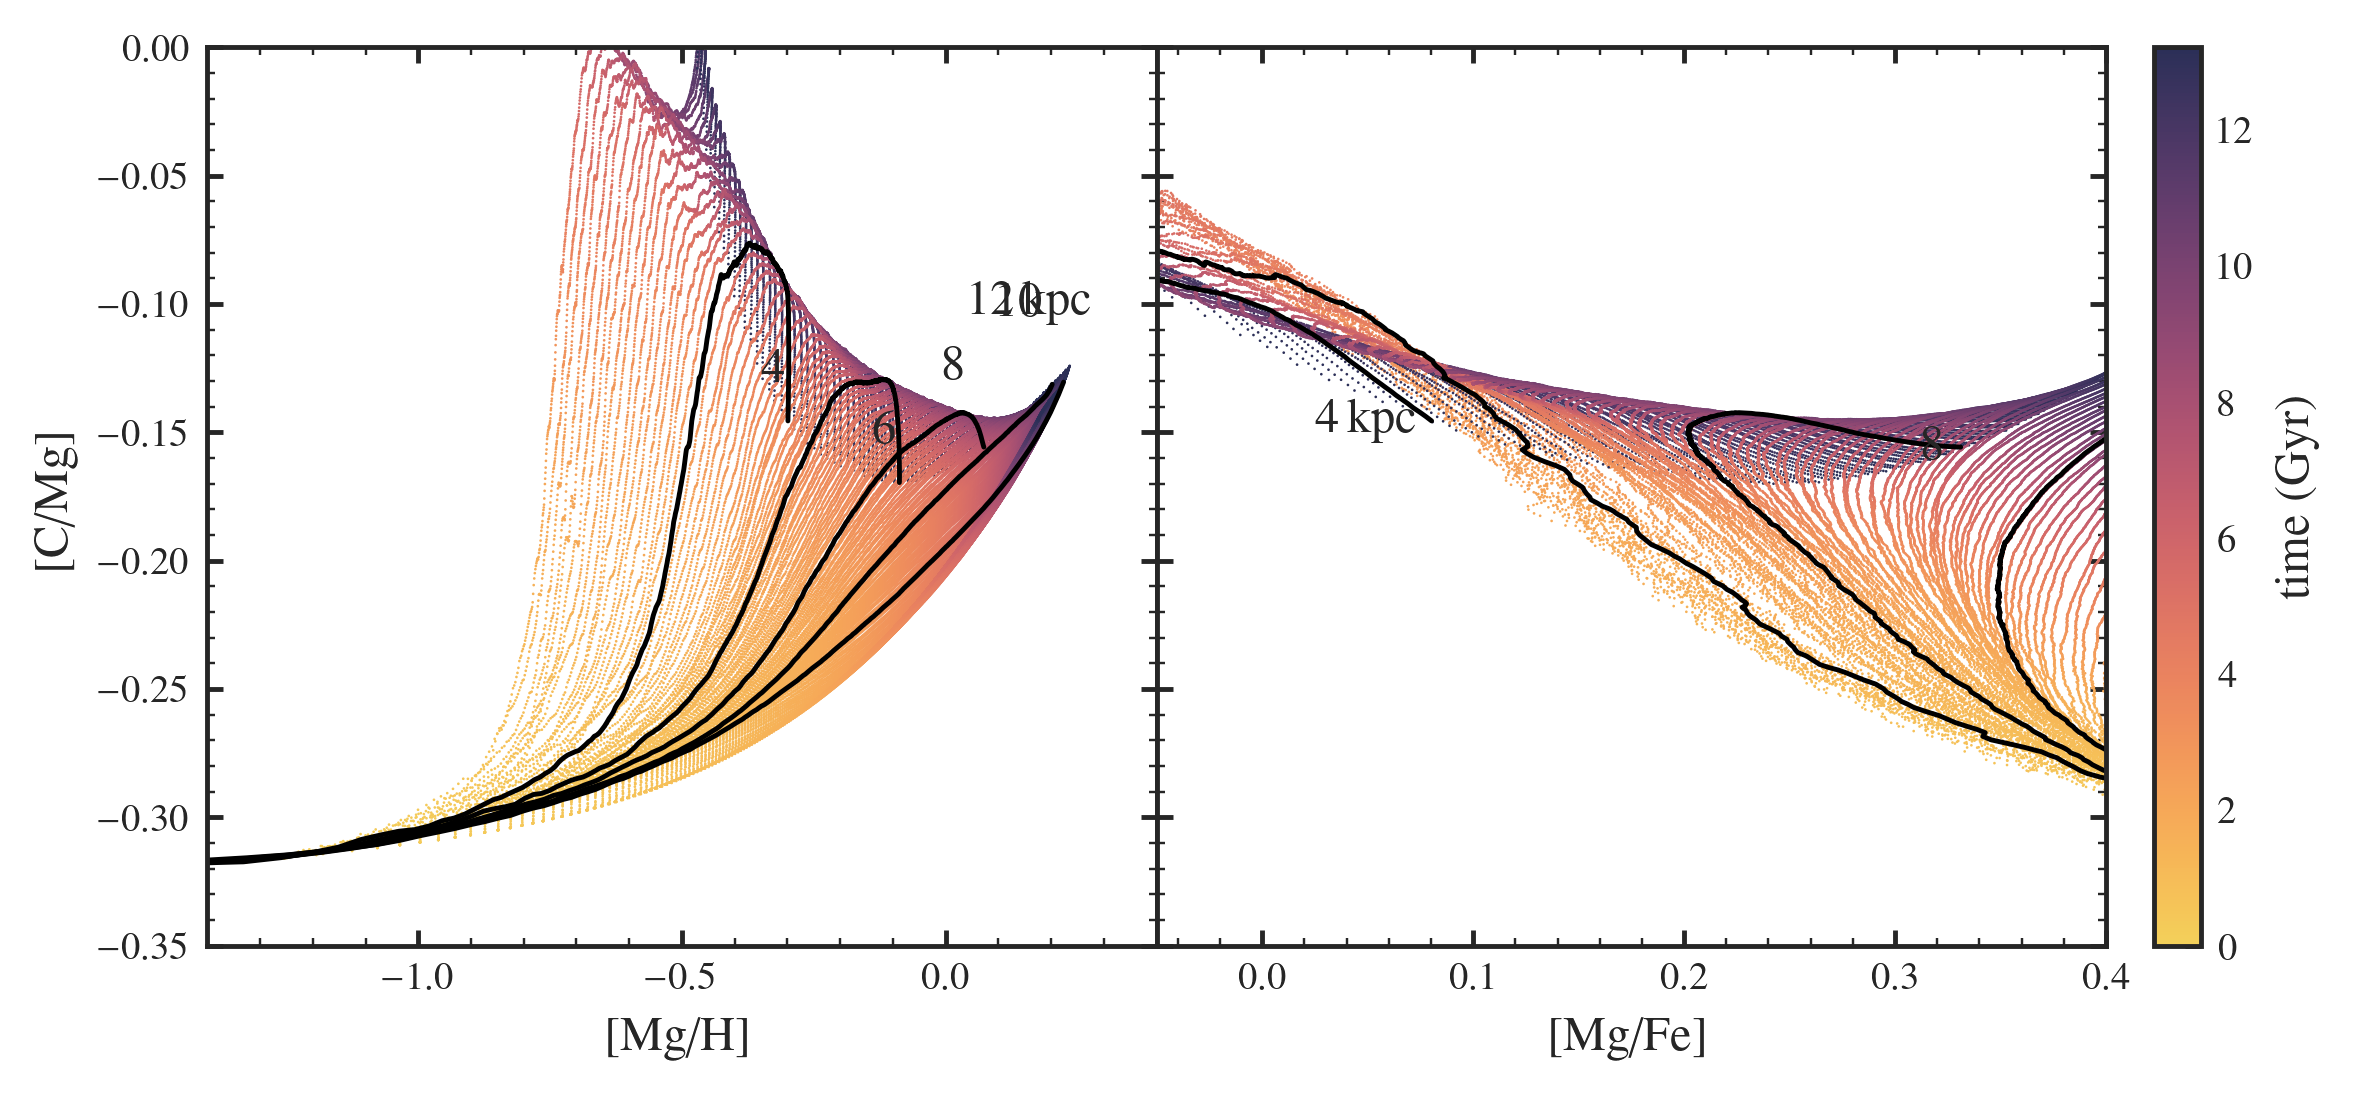

In [18]:
fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={"wspace": 0}, figsize=(7, 10/3), dpi=350)

plt.sca(axs[0])
h = fiducial.history

coords = []

for R in [4, 6, 8, 10, 12]:
    df = h[np.isclose(h.R, R - 0.05)]
    plt.plot(df.MG_H, df.C_MG, color="k")
    coords.append((
            df.MG_H[-1], 
            df.C_MG[-1]
        ))


texts = [
    "4",
    "6",
    "8",
    "10",
    r"12\,kpc"
]

for i in range(len(coords)):
    if i >= 2:
        offset = (-6, 12)
    else:
        offset = (-3, 6)
    text = plt.annotate(texts[i], xy=coords[i],  zorder=20, ha="center", va="bottom",  
                        xycoords='data', textcoords='offset points', xytext=offset)

sns.scatterplot(h[(h.R > 2) & (h.R < 15.5)], x="MG_H", y="C_MG", hue="time", s=0.3, alpha=1, legend=False, edgecolor="none", palette="arya_r", rasterized=True)
plt.xlim(-1.4, 0.4)
plt.ylim(-0.35, 0.0)
#surp.plots.plot_annulus_at_t(fiducial, "MG_H", "C_MG", t=2, zorder=-2)



plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.sca(axs[1])



filt = fiducial.history["MG_H"] > -0.15
filt &= fiducial.history["MG_H"] < -0.05
h = fiducial.history

cax = axs[1].inset_axes([1.05, 0., 0.05, 1])

cb = arya.Colorbar(clim=(0, 13.2), label=r"time (Gyr)", cmap="arya_r", cax=cax)


label_Rs = [4,8,12]
coords = []

for R in np.sort(h.R.unique()[19:155]):
    dfa = h[h.R == R]
    s = 1# 0*(0.05 - np.abs(dfa["[o/h]"] + 0.10))
    plt.scatter(dfa.O_FE, dfa.C_O, c=cb(dfa.time), s=0.3, ec="none", rasterized=True, zorder=1)
    if any(np.isclose(R+0.05, label_Rs)):
        coords.append((
            dfa["MG_FE"][-1], 
            dfa["C_MG"][-1]
        ))

        plt.plot(dfa["MG_FE"], dfa["C_MG"], color="k", zorder=2, lw=1)
    

texts = [
    "4\\,kpc",
   #"6",
    "8",
    #"10",
    r"12"
]


for i in range(len(coords)):
    text = plt.annotate(texts[i], xy=coords[i],  zorder=20, ha="right",  va="center",
                        xycoords='data', textcoords='offset points', xytext=(-3, 0))
#     text.set_path_effects([mpl.patheffects.Stroke(linewidth=5, foreground='w'),
#                    mpl.patheffects.Normal()])
    
plt.xlim(-0.05, 0.4)
# plt.ylim(-0.35, 0.05)
plt.xlabel("[Mg/Fe]")



plt.savefig("figures/all_the_tracks.pdf")

(-1.5, 0.11878386691890153)

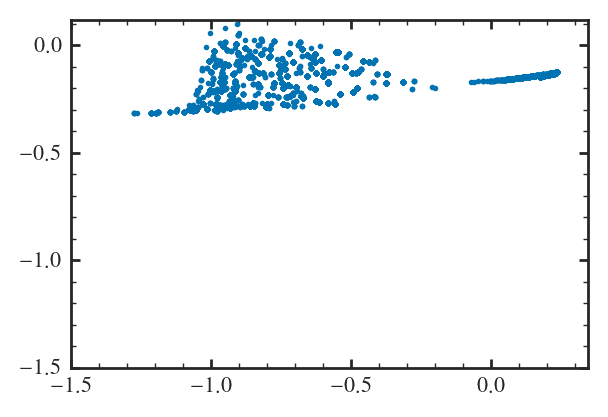

In [20]:
plt.scatter(fiducial.stars.MG_H, fiducial.stars.C_MG, s=1)
plt.xlim(-1.5)
plt.ylim(-1.5)

# F AGB
Here, I want to make plots of the AGB Fraction across the galaxy.

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 6.000e+00, 7.000e+00, 8.000e+00,
        1.900e+01, 4.300e+01, 8.800e+01, 6.900e+01, 9.900e+01, 1.720e+02,
        3.510e+02, 3.030e+02, 1.148e+03, 2.312e+03, 3.112e+03, 7.350e+02,
        1.273e+03, 9.450e+02, 5.910e+02, 2.010e+02, 2.480e+02, 1.360e+02,
        5.800e+01, 1.600e+01, 2.300e+01, 1.400e+01, 8.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 4.25 ,  4.425,  4.6  ,  4.775,  4.95 ,  5.125,  5.3  ,  5.475,
         5.65 ,  5.825,  6.   ,  6.175,  6.35 ,  6.525,  6.7  ,  6.875,
         7.05 ,  7.225,  7.4  ,  7.575,  7.75 ,  7.925,  8.1  ,  8.275,
         8.45 ,  8.625,  8.8  ,  8.975,  9.15 ,  9.325,  9.5  ,  9.675,
         9.85 , 10.025, 10.2  , 10.375, 10.55 , 10.725, 10.9  , 11.075,
        11.25 ]),
 <BarContainer object of 40 artists>)

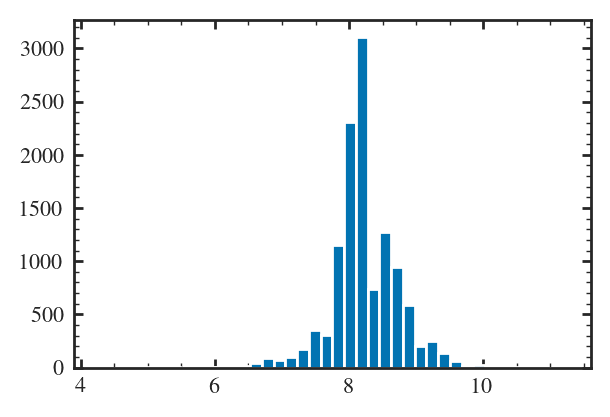

In [25]:
plt.hist(fiducial.stars.r_final, 40)

(array([ 927., 1518., 2225., 1594., 1070., 1551.,  190.,  127.,   45.,
          58.,  485.,  295.,   89.,  329.,  236.,  394.,  186.,  319.,
         201.,  161.]),
 array([ 0.05,  0.82,  1.59,  2.36,  3.13,  3.9 ,  4.67,  5.44,  6.21,
         6.98,  7.75,  8.52,  9.29, 10.06, 10.83, 11.6 , 12.37, 13.14,
        13.91, 14.68, 15.45]),
 <BarContainer object of 20 artists>)

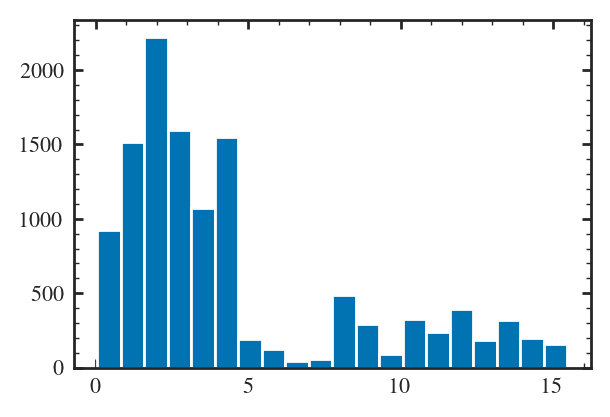

In [27]:
plt.hist(fiducial.stars.r_origin, 20)

In [28]:
h = fiducial.history

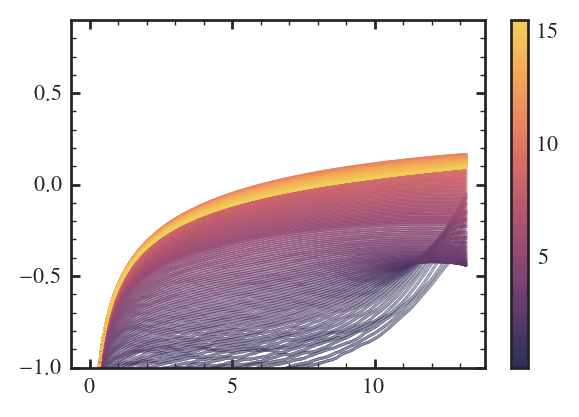

In [30]:
plt.scatter(h.time, h.M_H, c=h.R, s=0.005)
plt.ylim(-1, 0.9)
plt.colorbar()

In [31]:
h = fiducial.history
m_star = h["sfr"]*1e9 # Msun/yr (default)
denom = 1 + h["eta_0"] - h["r_eff"]
Zc = h["z(c)"]
Mc = h["mass(c)"] # Msun
dt = h.time.unique()[1] # Gyr

smooth = 10
Mc_dot = np.concatenate([np.zeros(smooth), 
                         Mc[smooth:] - np.array(Mc[:-smooth]),
                        ]
                       )/(smooth*dt)
Z = h["z"]

yc_cc = y_cc(Z)
y_c = (Mc_dot + denom*Zc*m_star)/m_star
y_c_agb = y_c - yc_cc
f_agb = np.array(y_c_agb/y_c)

X = np.reshape(f_agb, (200, -1))

KeyError: 'z(c)'

In [ ]:
surp.yields.ZETA_0/vice.yields.ccsne.settings["mg"] * surp.yields.Z_SUN

In [ ]:
max(f_agb[f_agb < 0.5])

In [32]:
plt.plot(np.transpose(X)[-1,:])
plt.ylim(-1, 1)

NameError: name 'X' is not defined

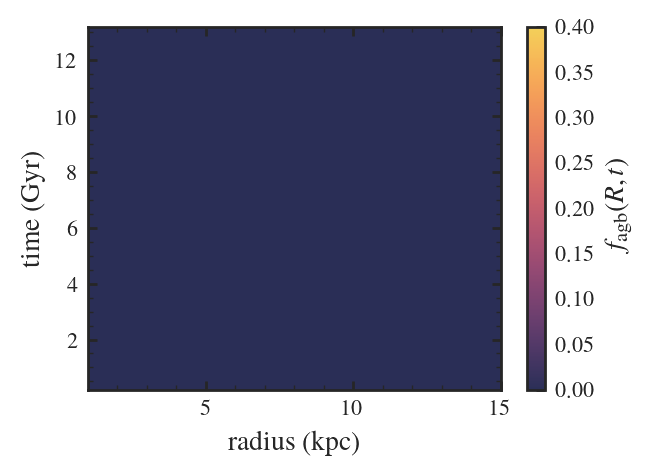

In [11]:
plt.figure(figsize=(10/3, 10/3/np.sqrt(2)))
plt.imshow(np.transpose(X)[::-1], clim=(0, 0.4), extent=(0, 20, 0, 13.2), aspect="auto")
plt.xlim(1, 15)
plt.ylim(smooth*dt)

plt.colorbar(label=r"$f_{\rm agb}(R, t)$")
plt.xlabel("radius (kpc)")
plt.ylabel("time (Gyr)")

plt.savefig("figures/f_agb_rt.pdf")

Text(0, 0.5, '[N/Mg]')

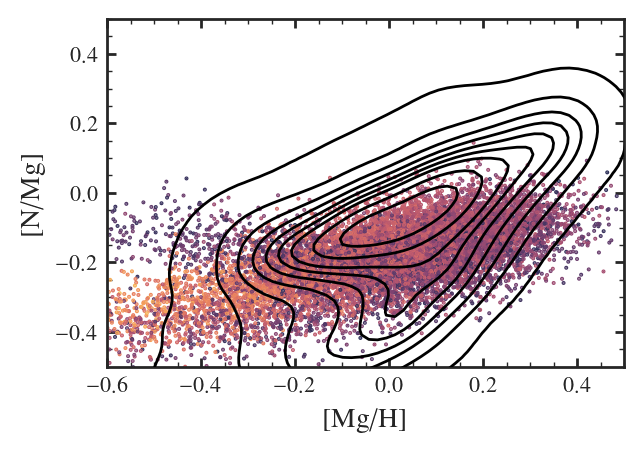

In [18]:
s = fiducial.stars
N = len(s)
dx = 0.09
dy = 0.05
aah.plot_contour("[mg/h]", "[n/mg]", zorder=3, exclude_high_alpha=False)

plt.scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[n/mg]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2)
plt.xlim(-0.6, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel("[Mg/H]")
plt.ylabel("[N/Mg]")


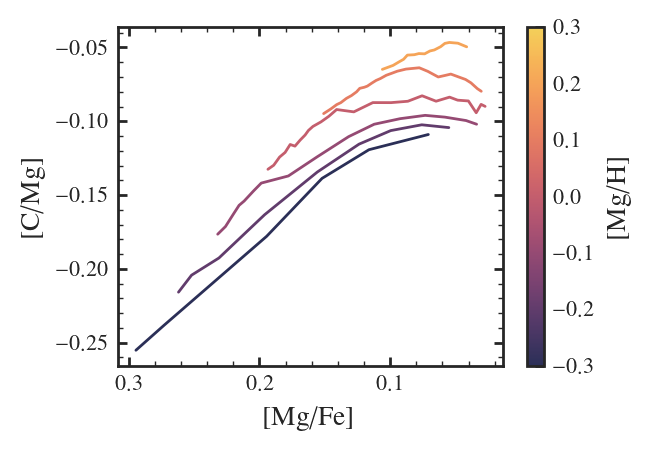

In [30]:
plt.figure(figsize=(10/3, 10/3/2**0.5))

cb = arya.Colorbar(clim=(-0.3, 0.3), label="[Mg/H]")

s = fiducial.stars
for MH in (-0.3, -0.2,-0.1,0, 0.1, 0.2,0.3):
    mh0 = MH - 0.05
    mh1 = MH + 0.05
    filt = s["[o/h]"] > mh0
    filt &= s["[o/h]"] < mh1
    df = s[filt]
    
    arya.medianplot(df, x="[o/fe]", y="[c/o]", binsize=100, color=cb(MH), aes="line", errorbar=None)

plt.gca().invert_xaxis()

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

plt.tight_layout()
plt.savefig("figures/fiducial_caafe_binned.pdf")